## Simple OOP example with Linear Regression
### Dr. Tirthajyoti Sarkar, Fremont, CA 94536

In this notebook, we will show how to leverage the power and flexibility of the Object-oriented programming (OOP) paradigm for machine learning.

In [1]:
import numpy as np

### A very simple class `MyLinearRegression`

In [2]:
class MyLinearRegression:
    
    def __init__(self, fit_intercept=True):
        self.coef_ = None
        self.intercept_ = None
        self._fit_intercept = fit_intercept

---
### Create an instance and check attributes

In [3]:
mlr = MyLinearRegression()

In [4]:
mlr._fit_intercept

True

In [5]:
mlr.coef_==None

True

In [6]:
mlr.intercept_ == None

True

In [7]:
print(mlr)

---
### Built-in description method
We can add a special built-in method `__repr__` to create a short description string

In [8]:
class MyLinearRegression:
    
    def __init__(self, fit_intercept=True):
        self.coef_ = None
        self.intercept_ = None
        self._fit_intercept = fit_intercept
    
    def __repr__(self):
        return "I am a Linear Regression model!"

In [9]:
mlr = MyLinearRegression()

In [10]:
print(mlr)

I am a Linear Regression model!


---
### Adding the `fit` method
Now, we can add the core fitting method called `fit`. This uses linear algebra routines from NumPy to solve a linear regression (single or multi-variate) problem.

In [11]:
class MyLinearRegression:
    
    def __init__(self, fit_intercept=True):
        self.coef_ = None
        self.intercept_ = None
        self._fit_intercept = fit_intercept
    
    def __repr__(self):
        return "I am a Linear Regression model!"
    
    def fit(self, X, y):
        """
        Fit model coefficients.

        Arguments:
        X: 1D or 2D numpy array 
        y: 1D numpy array
        """
        
        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
            
        # add bias if fit_intercept is True
        if self._fit_intercept:
            X_biased = np.c_[np.ones(X.shape[0]), X]
        else:
            X_biased = X
        
        # closed form solution
        xTx = np.dot(X_biased.T, X_biased)
        inverse_xTx = np.linalg.inv(xTx)
        xTy = np.dot(X_biased.T, y)
        coef = np.dot(inverse_xTx, xTy)
        
        # set attributes
        if self._fit_intercept:
            self.intercept_ = coef[0]
            self.coef_ = coef[1:]
        else:
            self.intercept_ = 0
            self.coef_ = coef

---
### Generate some random data for test

In [12]:
X = 10*np.random.random(size=(20,2))
y = 3.5*X.T[0]-1.2*X.T[1]+2*np.random.randn(20)

In [13]:
import matplotlib.pyplot as plt

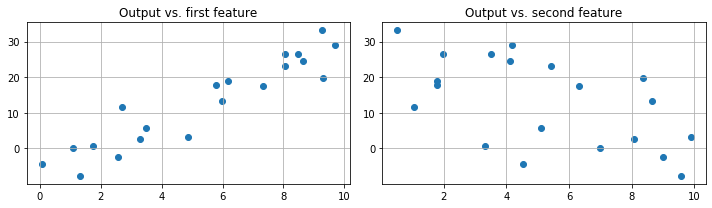

In [14]:
fig, ax = plt.subplots(1,2,figsize=(10,3))

ax[0].scatter(X.T[0],y)
ax[0].set_title("Output vs. first feature")
ax[0].grid(True)
ax[1].scatter(X.T[1],y)
ax[1].set_title("Output vs. second feature")
ax[1].grid(True)
fig.tight_layout()
plt.show()

---
### Instantiate a new `MyLinearRegression` object and fit the data

In [15]:
mlr = MyLinearRegression()

In [16]:
print("We have not fitted the data yet. There is no regression coefficients")
print("Regression coefficients:", mlr.coef_)

We have not fitted the data yet. There is no regression coefficients
Regression coefficients: None


In [17]:
mlr.fit(X,y)

In [18]:
print("We have fitted the data. We can print the regression coefficients now")
print("Regression coefficients:", mlr.coef_)

We have fitted the data. We can print the regression coefficients now
Regression coefficients: [ 3.34778254 -1.38767517]


In [19]:
print("The intercept term is given by: ", mlr.intercept_)

The intercept term is given by:  2.1898165857075256


---
### Comparison of ground truth and fitted values
Woudn't it be nice to compare the ground truth with the predictions and see how closely they fit

In [20]:
coef_ = mlr.coef_
y_pred = np.dot(X,coef_)+mlr.intercept_

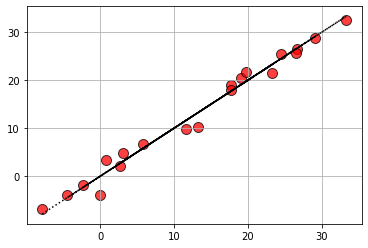

In [21]:
plt.scatter(y,y_pred,s=100,alpha=0.75,color='red',edgecolor='k')
plt.plot(y,y,c='k',linestyle='dotted')
plt.grid(True)
plt.show()

---
### Encapsulation
But we don't want to write stand-alone code. Can we _encapsulate_ the code inside the class?

In [22]:
class MyLinearRegression:
    
    def __init__(self, fit_intercept=True):
        self.coef_ = None
        self.intercept_ = None
        self._fit_intercept = fit_intercept
    
    def __repr__(self):
        return "I am a Linear Regression model!"
    
    def fit(self, X, y):
        """
        Fit model coefficients.

        Arguments:
        X: 1D or 2D numpy array 
        y: 1D numpy array
        """
        
        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
            
        # add bias if fit_intercept is True
        if self._fit_intercept:
            X_biased = np.c_[np.ones(X.shape[0]), X]
        else:
            X_biased = X
        
        # closed form solution
        xTx = np.dot(X_biased.T, X_biased)
        inverse_xTx = np.linalg.inv(xTx)
        xTy = np.dot(X_biased.T, y)
        coef = np.dot(inverse_xTx, xTy)
        
        # set attributes
        if self._fit_intercept:
            self.intercept_ = coef[0]
            self.coef_ = coef[1:]
        else:
            self.intercept_ = 0
            self.coef_ = coef
            
        # Predicted/fitted y
        self.fitted_ = np.dot(X,mlr.coef_) + mlr.intercept_
    
    def plot_fitted(self,reference_line=False):
        """
        Plots fitted values against the true output values from the data
        
        Arguments:
        reference_line: A Boolean switch to draw a 45-degree reference line on the plot
        """
        plt.title("True vs. fitted values",fontsize=14)
        plt.scatter(y,self.fitted_,s=100,alpha=0.75,color='red',edgecolor='k')
        if reference_line:
            plt.plot(y,y,c='k',linestyle='dotted')
        plt.xlabel("True values")
        plt.ylabel("Fitted values")
        plt.grid(True)
        plt.show()

---
### Demo the new `plot_fitted` method 
Now the `MyLinearRegression` class has the ability (aka methods) to both fit the data and visualize the fitted/true output values in a plot

In [23]:
# A fresh instance
mlr = MyLinearRegression()
# Fitting with the data
mlr.fit(X,y)

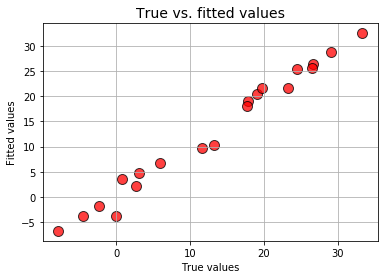

In [24]:
# Call the 'plot_fitted' method
mlr.plot_fitted()

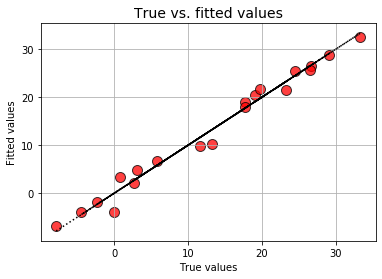

In [25]:
# We can pass on a switch 'reference_line' to draw a 45-degree reference line on the plot
mlr.plot_fitted(reference_line=True)

---
### Adding a `predict` method
Now, we want to extend the functionality and add a `predict` method to enable the class to predict for any arbitrary new dataset

In [26]:
class MyLinearRegression:
    
    def __init__(self, fit_intercept=True):
        self.coef_ = None
        self.intercept_ = None
        self._fit_intercept = fit_intercept
    
    def __repr__(self):
        return "I am a Linear Regression model!"
    
    def fit(self, X, y):
        """
        Fit model coefficients.

        Arguments:
        X: 1D or 2D numpy array 
        y: 1D numpy array
        """
        
        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
            
        # add bias if fit_intercept is True
        if self._fit_intercept:
            X_biased = np.c_[np.ones(X.shape[0]), X]
        else:
            X_biased = X
        
        # closed form solution
        xTx = np.dot(X_biased.T, X_biased)
        inverse_xTx = np.linalg.inv(xTx)
        xTy = np.dot(X_biased.T, y)
        coef = np.dot(inverse_xTx, xTy)
        
        # set attributes
        if self._fit_intercept:
            self.intercept_ = coef[0]
            self.coef_ = coef[1:]
        else:
            self.intercept_ = 0
            self.coef_ = coef
            
        # Predicted/fitted y
        self.fitted_ = np.dot(X,mlr.coef_) + mlr.intercept_
    
    def plot_fitted(self,reference_line=False):
        """
        Plots fitted values against the true output values from the data
        
        Arguments:
        reference_line: A Boolean switch to draw a 45-degree reference line on the plot
        """
        plt.title("True vs. fitted values",fontsize=14)
        plt.scatter(y,self.fitted_,s=100,alpha=0.75,color='red',edgecolor='k')
        if reference_line:
            plt.plot(y,y,c='k',linestyle='dotted')
        plt.xlabel("True values")
        plt.ylabel("Fitted values")
        plt.grid(True)
        plt.show()
    
    def predict(self, X):
        """Output model prediction.

        Arguments:
        X: 1D or 2D numpy array
        """
        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
        self.predicted_ = self.intercept_ + np.dot(X, self.coef_)
        return self.predicted_

---
### Testing `predict` method with new data 
Note the number of samples is different from the training set.

In [27]:
num_new_samples = 10
X_new = 10*np.random.random(size=(num_new_samples,2))

In [28]:
y_new = 3.5*X_new.T[0]-1.2*X_new.T[1]+2*np.random.randn(num_new_samples)

In [29]:
mlr = MyLinearRegression()

In [30]:
mlr.fit(X,y)

In [31]:
y_pred=mlr.predict(X_new)

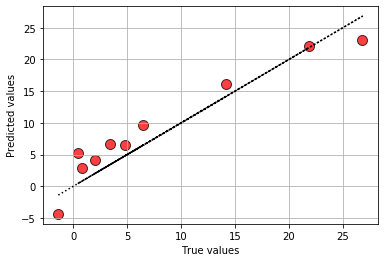

In [32]:
plt.scatter(y_new,y_pred,s=100,alpha=0.75,color='red',edgecolor='k')
plt.plot(y_new,y_new,c='k',linestyle='dotted')
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.grid(True)
plt.show()

---
### Moving towards regression metrics - degrees of freedom
We will now move towards regression metrics (and statistical inference). For that, we first need to introduce few more attributes associated with the dataset - degrees of freedom. They will be computed when we try to fit a dataset. They will be used later to compute metric like $\textbf{adjusted } R^2$.

`dft_` : degrees of freedom of the estimate of the population variance of the dependent variable<br>
`dfe_` : degrees of freedom of the estimate of the underlying population error variance

In [33]:
class MyLinearRegression:
    
    def __init__(self, fit_intercept=True):
        self.coef_ = None
        self.intercept_ = None
        self._fit_intercept = fit_intercept
    
    def __repr__(self):
        return "I am a Linear Regression model!"
    
    def fit(self, X, y):
        """
        Fit model coefficients.

        Arguments:
        X: 1D or 2D numpy array 
        y: 1D numpy array
        """
        
        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
        
        # features and data
        self.features_ = X
        self.target__ = y
        
        # degrees of freedom of population dependent variable variance
        self.dft_ = X.shape[0] - 1   
        # degrees of freedom of population error variance
        self.dfe_ = X.shape[0] - X.shape[1] - 1
            
        # add bias if fit_intercept is True
        if self._fit_intercept:
            X_biased = np.c_[np.ones(X.shape[0]), X]
        else:
            X_biased = X
        
        # closed form solution
        xTx = np.dot(X_biased.T, X_biased)
        inverse_xTx = np.linalg.inv(xTx)
        xTy = np.dot(X_biased.T, y)
        coef = np.dot(inverse_xTx, xTy)
        
        # set attributes
        if self._fit_intercept:
            self.intercept_ = coef[0]
            self.coef_ = coef[1:]
        else:
            self.intercept_ = 0
            self.coef_ = coef
            
        # Predicted/fitted y
        self.fitted_ = np.dot(X,mlr.coef_) + mlr.intercept_
    
    def plot_fitted(self,reference_line=False):
        """
        Plots fitted values against the true output values from the data
        
        Arguments:
        reference_line: A Boolean switch to draw a 45-degree reference line on the plot
        """
        plt.scatter(y,self.fitted_,s=100,alpha=0.75,color='red',edgecolor='k')
        if reference_line:
            plt.plot(y,y,c='k',linestyle='dotted')
        plt.xlabel("True values")
        plt.ylabel("Fitted values")
        plt.grid(True)
        plt.show()
    
    def predict(self, X):
        """Output model prediction.

        Arguments:
        X: 1D or 2D numpy array
        """
        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
        self.predicted_ = self.intercept_ + np.dot(X, self.coef_)
        return self.predicted_

In [34]:
mlr = MyLinearRegression()
mlr.fit(X,y)

In [35]:
mlr.dfe_

17

In [36]:
mlr.dft_

19

### `Metrics` class
We could have added a whole bunch of methods directly into the `MyLinearRegression` class. But, instead, we will show the power of inheritance and define a separate class `Metrics` for computing common metrics of a regression model.

Note, this class has no `__init__` method because we will never instantiate an object using this class. Rather, we will sort of absorb this class into the `MyLinearRegression` class.

In [37]:
class Metrics:
              
    def sse(self):
        '''returns sum of squared errors (model vs actual)'''
        squared_errors = (self.resid_) ** 2
        self.sq_error_ = np.sum(squared_errors)
        return self.sq_error_
        
    def sst(self):
        '''returns total sum of squared errors (actual vs avg(actual))'''
        avg_y = np.mean(self.target_)
        squared_errors = (self.target_ - avg_y) ** 2
        self.sst_ = np.sum(squared_errors)
        return self.sst_
    
    def r_squared(self):
        '''returns calculated value of r^2'''
        self.r_sq_ = 1 - self.sse()/self.sst()
        return self.r_sq_
    
    def adj_r_squared(self):
        '''returns calculated value of adjusted r^2'''
        self.adj_r_sq_ = 1 - (self.sse()/self.dfe_) / (self.sst()/self.dft_)
        return self.adj_r_sq_
    
    def mse(self):
        '''returns calculated value of mse'''
        self.mse_ = np.mean( (self.predict(self.features_) - self.target_) ** 2 )
        return self.mse_
    
    def pretty_print_stats(self):
        '''returns report of statistics for a given model object'''
        items = ( ('sse:', self.sse()), ('sst:', self.sst()), 
                 ('mse:', self.mse()), ('r^2:', self.r_squared()), 
                  ('adj_r^2:', self.adj_r_squared()))
        for item in items:
            print('{0:8} {1:.4f}'.format(item[0], item[1]))

### Class with inheritance
Now we inherit the `Metrics` class in the `MyLinearRegression` class by passing on `Metrics` in the very defination of the `MyLinearRegression` class.

We also need to add a new attribute - `resid_`. These are the residuals (the difference between the fitted values and true target_/output values), which are used by the methods in the `Metrics` perform the necessary computations. 

In [38]:
class MyLinearRegression(Metrics):
    
    def __init__(self, fit_intercept=True):
        self.coef_ = None
        self.intercept_ = None
        self._fit_intercept = fit_intercept
    
    def __repr__(self):
        return "I am a Linear Regression model!"
    
    def fit(self, X, y):
        """
        Fit model coefficients.

        Arguments:
        X: 1D or 2D numpy array 
        y: 1D numpy array
        """
        
        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
        
        # features and data
        self.features_ = X
        self.target_ = y
        
        # degrees of freedom of population dependent variable variance
        self.dft_ = X.shape[0] - 1   
        # degrees of freedom of population error variance
        self.dfe_ = X.shape[0] - X.shape[1] - 1
            
        # add bias if fit_intercept is True
        if self._fit_intercept:
            X_biased = np.c_[np.ones(X.shape[0]), X]
        else:
            X_biased = X
        
        # closed form solution
        xTx = np.dot(X_biased.T, X_biased)
        inverse_xTx = np.linalg.inv(xTx)
        xTy = np.dot(X_biased.T, y)
        coef = np.dot(inverse_xTx, xTy)
        
        # set attributes
        if self._fit_intercept:
            self.intercept_ = coef[0]
            self.coef_ = coef[1:]
        else:
            self.intercept_ = 0
            self.coef_ = coef
            
        # Predicted/fitted y
        self.fitted_ = np.dot(X,mlr.coef_) + mlr.intercept_
        
        # Residuals
        residuals = self.target_ - self.fitted_
        self.resid_ = residuals
    
    def plot_fitted(self,reference_line=False):
        """
        Plots fitted values against the true output values from the data
        
        Arguments:
        reference_line: A Boolean switch to draw a 45-degree reference line on the plot
        """
        plt.title("True vs. fitted values",fontsize=14)
        plt.scatter(y,self.fitted_,s=100,alpha=0.75,color='red',edgecolor='k')
        if reference_line:
            plt.plot(y,y,c='k',linestyle='dotted')
        plt.xlabel("True values")
        plt.ylabel("Fitted values")
        plt.grid(True)
        plt.show()
    
    def predict(self, X):
        """Output model prediction.

        Arguments:
        X: 1D or 2D numpy array
        """
        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
        self.predicted_ = self.intercept_ + np.dot(X, self.coef_)
        return self.predicted_

### Demo the newly acquired power of `MyLinearRegression` - the metrics

In [39]:
mlr = MyLinearRegression()

In [40]:
fit=mlr.fit(X,y)

In [41]:
mlr.sse()

52.29620169650658

In [42]:
mlr.sst()

2952.6956292134073

In [43]:
mlr.r_squared()

0.9822886581403454

In [44]:
mlr.pretty_print_stats()

sse:     52.2962
sst:     2952.6956
mse:     2.6148
r^2:     0.9823
adj_r^2: 0.9802


In [45]:
mlr.resid_

array([-1.11202629,  0.18163423,  0.87380481, -1.31987254, -1.27503193,
        0.28947718, -1.89527517, -0.56991112, -0.87346478, -0.28187532,
        2.99303852,  1.82098677,  0.65175513,  0.87339867, -1.6227975 ,
        1.62232471, -0.55441197,  3.85246154, -2.69298212, -0.96123283])

---
### Visual diagnostics
The success of a linear regression model depends on some fundamental assumptions about the nature of the underlying data that it tries to model. [See this article](https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-regression/simple-linear-regression-assumptions.html) for a simple and intuitive understanding of these assumptions.

It is, therefore, extremely important to check the quality of your linear regression model, by verifying whether these assumptions were “reasonably” satisfied (generally visual analytics methods, which are subject to interpretation, are used to check the assumptions).

Visual diagnostics play a crucial part in this quality check. Following plots can be constructed from the any linear regression fitted model. They can be termed diagnostics.

* Residuals vs. predicting variables plots
* Fitted vs. residuals plot
* Histogram of the normalized residuals
* Q-Q plot of the normalized residuals

[See this article](https://towardsdatascience.com/how-do-you-check-the-quality-of-your-regression-model-in-python-fa61759ff685) for a more detailed discussion and the general approach. Here, we will add these visual diagnostics to the `MyLinearRegression` class.

As an instance, let's plot the fitted vs. residuals plot. Ideally, this plot should show no pattern, residuals distributed completely randomly around the zero line.

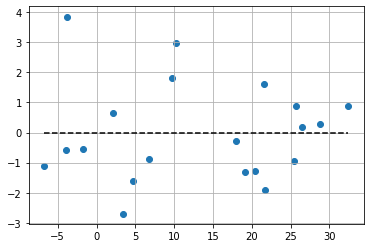

In [46]:
plt.scatter(mlr.fitted_,mlr.resid_)
plt.hlines(y=0,xmin=np.amin(mlr.fitted_),xmax=np.amax(mlr.fitted_),color='k',linestyle='dashed')
plt.grid(True)
plt.show()

---
### Creating a separate `Diagnostics_plots` class

In [47]:
class Diagnostics_plots:
    
    def __init__():
        pass
    
    def fitted_vs_residual(self):
        '''Plots fitted values vs. residuals'''
        plt.title("Fitted vs. residuals plot",fontsize=14)
        plt.scatter(self.fitted_,self.resid_,edgecolor='k')
        plt.hlines(y=0,xmin=np.amin(self.fitted_),xmax=np.amax(self.fitted_),color='k',linestyle='dashed')
        plt.xlabel("Fitted values")
        plt.ylabel("Residuals")
        plt.show()
    
    def fitted_vs_features(self):
        '''Plots residuals vs all feature variables in a grid'''
        num_plots = self.features_.shape[1]
        if num_plots%3==0:
            nrows = int(num_plots/3)
        else:
            nrows = int(num_plots/3)+1
        ncols = 3
        fig, ax = plt.subplots(nrows, ncols, figsize=(15,nrows*3.5))
        axes = ax.ravel()
        for i in range(num_plots,nrows*ncols):
            axes[i].set_visible(False)
        for i in range(num_plots):
            axes[i].scatter(self.features_.T[i],self.resid_,color='orange',edgecolor='k',alpha=0.8)
            axes[i].grid(True)
            axes[i].set_xlabel("Feature X[{}]".format(i))
            axes[i].set_ylabel("Residuals")
            axes[i].hlines(y=0,xmin=np.amin(self.features_.T[i]),xmax=np.amax(self.features_.T[i]),
                           color='k',linestyle='dashed')
        plt.show()
        
    def histogram_resid(self,normalized=True):
        '''Plots a histogram of the residuals (can be normalized)'''
        if normalized:
            norm_r=self.resid_/np.linalg.norm(self.resid_)
        else:
            norm_r = self.resid_
        num_bins=min(20,int(np.sqrt(self.features_.shape[0])))
        plt.title("Histogram of the normalized residuals")
        plt.hist(norm_r,bins=num_bins,edgecolor='k')
        plt.xlabel("Normalized residuals")
        plt.ylabel("Count")
        plt.show()
    
    def shapiro_test(self,normalized=True):
        '''Performs Shapiro-Wilk normality test on the residuals'''
        from scipy.stats import shapiro
        if normalized:
            norm_r=self.resid_/np.linalg.norm(self.resid_)
        else:
            norm_r = self.resid_
        _,p = shapiro(norm_r)
        if p > 0.01:
            print("The residuals seem to have come from a Gaussian process")
        else:
            print("The residuals does not seem to have come from a Gaussian process. \
            \nNormality assumptions of the linear regression may have been violated.")
        
    def qqplot_resid(self,normalized=True):
        '''Creates a quantile-quantile plot for residuals comparing with a normal distribution'''
        from scipy.stats import probplot
        if normalized:
            norm_r=self.resid_/np.linalg.norm(self.resid_)
        else:
            norm_r = self.resid_
        plt.title("Q-Q plot of the normalized residuals")
        probplot(norm_r,dist='norm',plot=plt)
        plt.xlabel("Theoretical quantiles")
        plt.ylabel("Residual quantiles")
        plt.show()

---
### Inheritance from more than one classes
We can inherit from more than one classes. Already, we have defined `MyLinearRegression` so as to inherit from `Metrics` class. We can add `Diagnostic_plots` to the list too.

In [48]:
class MyLinearRegression(Metrics, Diagnostics_plots):
    
    def __init__(self, fit_intercept=True):
        self.coef_ = None
        self.intercept_ = None
        self._fit_intercept = fit_intercept
    
    def __repr__(self):
        return "I am a Linear Regression model!"
    
    def fit(self, X, y):
        """
        Fit model coefficients.

        Arguments:
        X: 1D or 2D numpy array 
        y: 1D numpy array
        """
        
        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
        
        # features and data
        self.features_ = X
        self.target_ = y
        
        # degrees of freedom of population dependent variable variance
        self.dft_ = X.shape[0] - 1   
        # degrees of freedom of population error variance
        self.dfe_ = X.shape[0] - X.shape[1] - 1
            
        # add bias if fit_intercept is True
        if self._fit_intercept:
            X_biased = np.c_[np.ones(X.shape[0]), X]
        else:
            X_biased = X
        
        # closed form solution
        xTx = np.dot(X_biased.T, X_biased)
        inverse_xTx = np.linalg.inv(xTx)
        xTy = np.dot(X_biased.T, y)
        coef = np.dot(inverse_xTx, xTy)
        
        # set attributes
        if self._fit_intercept:
            self.intercept_ = coef[0]
            self.coef_ = coef[1:]
        else:
            self.intercept_ = 0
            self.coef_ = coef
            
        # Predicted/fitted y
        self.fitted_ = np.dot(X,mlr.coef_) + mlr.intercept_
        
        # Residuals
        residuals = self.target_ - self.fitted_
        self.resid_ = residuals
    
    def plot_fitted(self,reference_line=False):
        """
        Plots fitted values against the true output values from the data
        
        Arguments:
        reference_line: A Boolean switch to draw a 45-degree reference line on the plot
        """
        plt.title("True vs. fitted values",fontsize=14)
        plt.scatter(y,self.fitted_,s=100,alpha=0.75,color='red',edgecolor='k')
        if reference_line:
            plt.plot(y,y,c='k',linestyle='dotted')
        plt.xlabel("True values")
        plt.ylabel("Fitted values")
        plt.grid(True)
        plt.show()
    
    def predict(self, X):
        """Output model prediction.

        Arguments:
        X: 1D or 2D numpy array
        """
        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
        self.predicted_ = self.intercept_ + np.dot(X, self.coef_)
        return self.predicted_

---
### Testing diagnostics plots

In [49]:
num_samples=100
num_dim = 2
X = 10*np.random.random(size=(num_samples,num_dim))
y = 3.5*X.T[0]-1.2*X.T[1]+2*np.random.randn(num_samples)

In [50]:
mlr = MyLinearRegression()
mlr.fit(X,y)

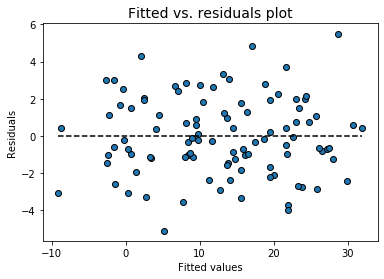

In [51]:
mlr.fitted_vs_residual()

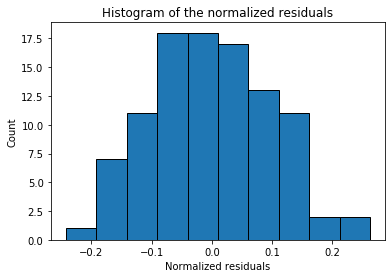

In [52]:
mlr.histogram_resid()

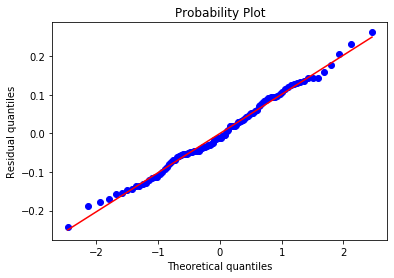

In [53]:
mlr.qqplot_resid()

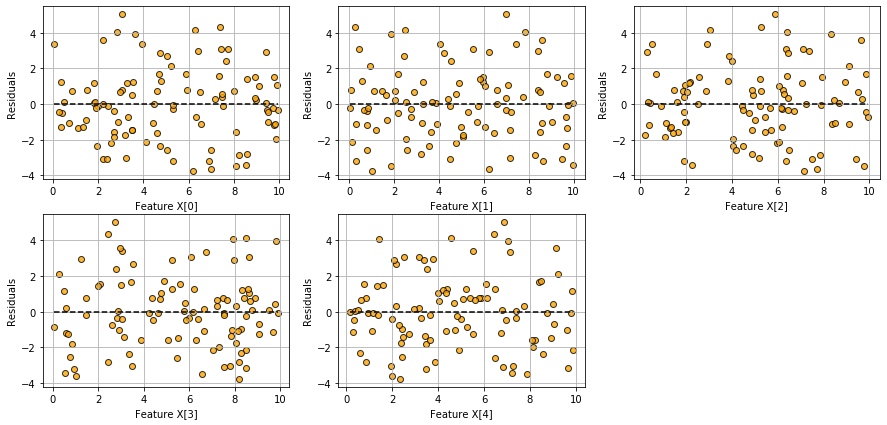

In [54]:
num_samples=100
num_dim = 5
X = 10*np.random.random(size=(num_samples,num_dim))
coeff = np.array([2,-3.5,1.2,4.1,-2.5])
y = np.dot(coeff,X.T)+2*np.random.randn(num_samples)

mlr.fit(X,y)
mlr.fitted_vs_features()

In [55]:
mlr.shapiro_test()

The residuals seem to have come from a Gaussian process


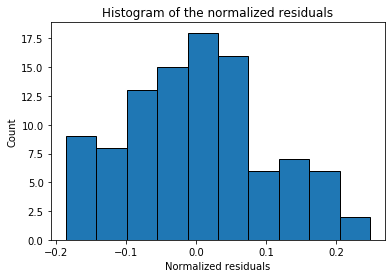

In [56]:
mlr.histogram_resid()

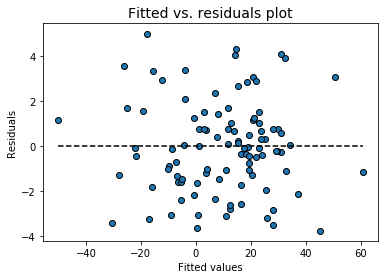

In [57]:
mlr.fitted_vs_residual()

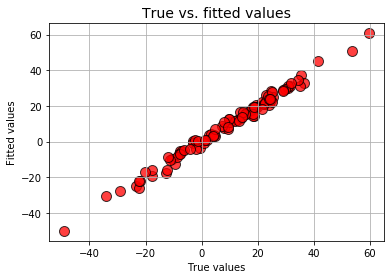

In [58]:
mlr.plot_fitted()

---
### Moving normal plot methods to a separate class
We saw the power of inheritance. Therefore, to de-clutter the main class definition, we should remove the plot methods to a separate plotting class. This is also a time-tested principle of OOP that methods, which can be grouped under a common category, should have their own class, which can be inherited by one main class.

We define a `Data_plots` class which now contains the `plot_fitted` method. We also add a general pairwise plot functionality to this class using the `pairplot` from `Seaborn` library.

In [59]:
class Data_plots:
    
    def __init__():
        pass
    
    def pairplot(self):
        '''Creates pairplot of all variables and the target using the Seaborn library'''
        
        print ("This may take a little time. Have patience...")
        from seaborn import pairplot
        from pandas import DataFrame
        df = DataFrame(np.hstack((self.features_,self.target_.reshape(-1,1))))
        pairplot(df)
        plt.show()
    
    def plot_fitted(self,reference_line=False):
        """
        Plots fitted values against the true output values from the data
        
        Arguments:
        reference_line: A Boolean switch to draw a 45-degree reference line on the plot
        """
        plt.title("True vs. fitted values",fontsize=14)
        plt.scatter(y,self.fitted_,s=100,alpha=0.75,color='red',edgecolor='k')
        if reference_line:
            plt.plot(y,y,c='k',linestyle='dotted')
        plt.xlabel("True values")
        plt.ylabel("Fitted values")
        plt.grid(True)
        plt.show()

In [60]:
class MyLinearRegression(Metrics, Diagnostics_plots,Data_plots):
    
    def __init__(self, fit_intercept=True):
        self.coef_ = None
        self.intercept_ = None
        self._fit_intercept = fit_intercept
    
    def __repr__(self):
        return "I am a Linear Regression model!"
    
    def fit(self, X, y):
        """
        Fit model coefficients.

        Arguments:
        X: 1D or 2D numpy array 
        y: 1D numpy array
        """
        
        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
        
        # features and data
        self.features_ = X
        self.target_ = y
        
        # degrees of freedom of population dependent variable variance
        self.dft_ = X.shape[0] - 1   
        # degrees of freedom of population error variance
        self.dfe_ = X.shape[0] - X.shape[1] - 1
            
        # add bias if fit_intercept is True
        if self._fit_intercept:
            X_biased = np.c_[np.ones(X.shape[0]), X]
        else:
            X_biased = X
        
        # closed form solution
        xTx = np.dot(X_biased.T, X_biased)
        inverse_xTx = np.linalg.inv(xTx)
        xTy = np.dot(X_biased.T, y)
        coef = np.dot(inverse_xTx, xTy)
        
        # set attributes
        if self._fit_intercept:
            self.intercept_ = coef[0]
            self.coef_ = coef[1:]
        else:
            self.intercept_ = 0
            self.coef_ = coef
            
        # Predicted/fitted y
        self.fitted_ = np.dot(X,mlr.coef_) + mlr.intercept_
        
        # Residuals
        residuals = self.target_ - self.fitted_
        self.resid_ = residuals
    
    def predict(self, X):
        """Output model prediction.

        Arguments:
        X: 1D or 2D numpy array
        """
        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
        self.predicted_ = self.intercept_ + np.dot(X, self.coef_)
        return self.predicted_

In [61]:
num_samples=100
num_dim = 5
X = 10*np.random.random(size=(num_samples,num_dim))
coeff = np.array([2,-3.5,1.2,4.1,-2.5])
y = np.dot(coeff,X.T)+2*np.random.randn(num_samples)

In [62]:
mlr = MyLinearRegression()
mlr.fit(X,y)

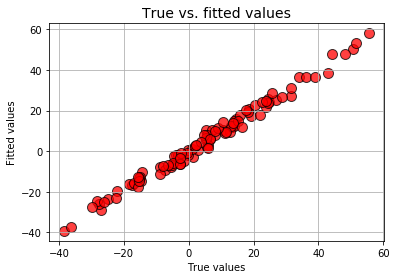

In [63]:
mlr.plot_fitted()

This may take a little time. Have patience...


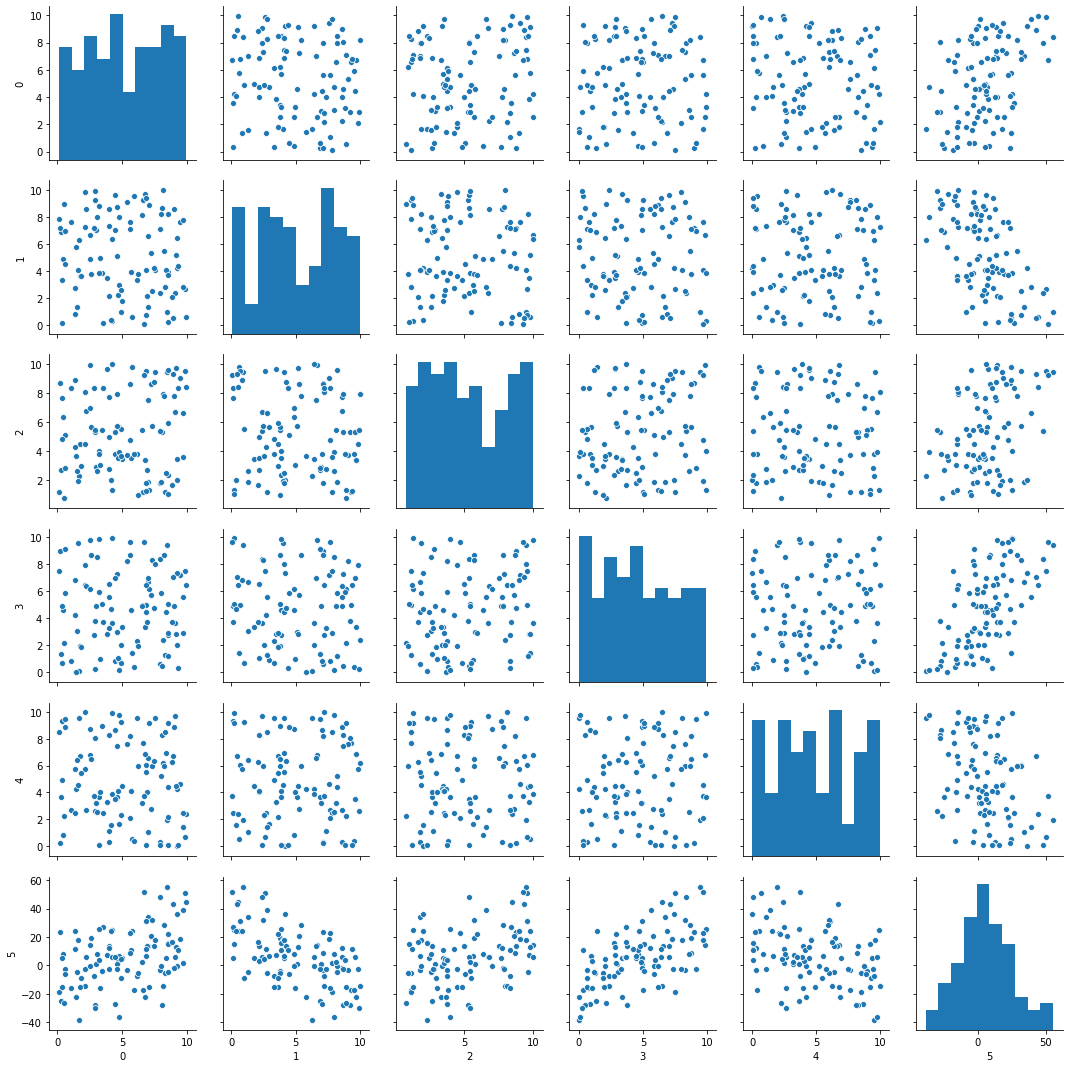

In [64]:
mlr.pairplot()

---
### Outliers detection
Outliers can also be an issue impacting the model quality by having a disproportionate influence on the estimated model parameters. We can use a measure called **Cook’s distance** to check for outliers. It essentially measures the effect of deleting a given observation. Points with a large Cook’s distance need to be closely examined for being potential outliers.

We can create a special `Outliers` class for storing functions related to outliers.

In [65]:
class Outliers:
    
    def __init__():
        pass
    
    def cook_distance(self):
        '''Computes and plots Cook\'s distance'''
        import statsmodels.api as sm
        from statsmodels.stats.outliers_influence import OLSInfluence as influence
        lm = sm.OLS(self.target_, sm.add_constant(self.features_)).fit()
        inf=influence(lm)
        (c, p) = inf.cooks_distance
        plt.figure(figsize=(8,5))
        plt.title("Cook's distance plot for the residuals",fontsize=14)
        plt.stem(np.arange(len(c)), c, markerfmt=",", use_line_collection=True)
        plt.grid(True)
        plt.show()
    
    def influence_plot(self):
        '''Creates the influence plot'''
        import statsmodels.api as sm
        lm = sm.OLS(self.target_, sm.add_constant(self.features_)).fit()
        fig, ax = plt.subplots(figsize=(10,8))
        fig = sm.graphics.influence_plot(lm, ax= ax, criterion="cooks")
        plt.show()
    
    def leverage_resid_plot(self):
        '''Plots leverage vs normalized residuals' square'''
        import statsmodels.api as sm
        lm = sm.OLS(self.target_, sm.add_constant(self.features_)).fit()
        fig, ax = plt.subplots(figsize=(10,8))
        fig = sm.graphics.plot_leverage_resid2(lm, ax= ax)
        plt.show()

In [66]:
class MyLinearRegression(Metrics, Diagnostics_plots,Data_plots,Outliers):
    
    def __init__(self, fit_intercept=True):
        self.coef_ = None
        self.intercept_ = None
        self._fit_intercept = fit_intercept
    
    def __repr__(self):
        return "I am a Linear Regression model!"
    
    def fit(self, X, y):
        """
        Fit model coefficients.

        Arguments:
        X: 1D or 2D numpy array 
        y: 1D numpy array
        """
        
        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
        
        # features and data
        self.features_ = X
        self.target_ = y
        
        # degrees of freedom of population dependent variable variance
        self.dft_ = X.shape[0] - 1   
        # degrees of freedom of population error variance
        self.dfe_ = X.shape[0] - X.shape[1] - 1
            
        # add bias if fit_intercept is True
        if self._fit_intercept:
            X_biased = np.c_[np.ones(X.shape[0]), X]
        else:
            X_biased = X
        
        # closed form solution
        xTx = np.dot(X_biased.T, X_biased)
        inverse_xTx = np.linalg.inv(xTx)
        xTy = np.dot(X_biased.T, y)
        coef = np.dot(inverse_xTx, xTy)
        
        # set attributes
        if self._fit_intercept:
            self.intercept_ = coef[0]
            self.coef_ = coef[1:]
        else:
            self.intercept_ = 0
            self.coef_ = coef
            
        # Predicted/fitted y
        self.fitted_ = np.dot(X,mlr.coef_) + mlr.intercept_
        
        # Residuals
        residuals = self.target_ - self.fitted_
        self.resid_ = residuals
    
    def predict(self, X):
        """Output model prediction.

        Arguments:
        X: 1D or 2D numpy array
        """
        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
        self.predicted_ = self.intercept_ + np.dot(X, self.coef_)
        return self.predicted_

In [67]:
num_samples=200
num_dim = 5
X = 10*np.random.random(size=(num_samples,num_dim))
coeff = np.array([2,-3.5,1.2,4.1,-2.5])
y = np.dot(coeff,X.T)+2*np.random.randn(num_samples)

In [68]:
mlr = MyLinearRegression()
mlr.fit(X,y)

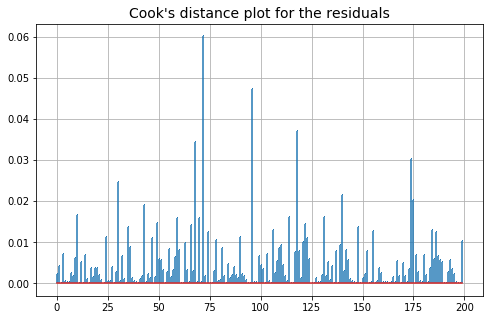

In [69]:
mlr.cook_distance()

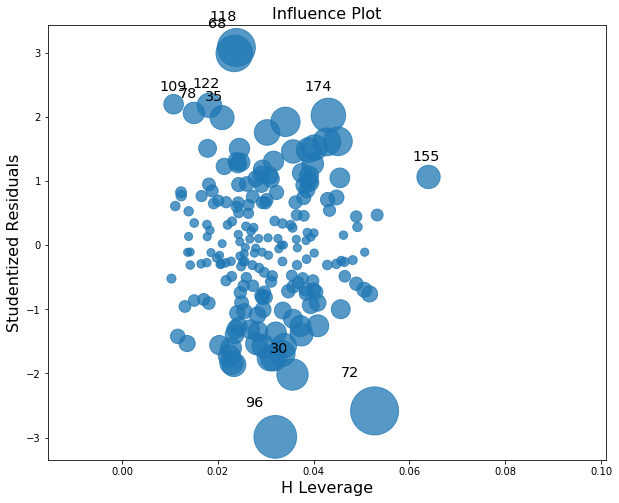

In [70]:
mlr.influence_plot()

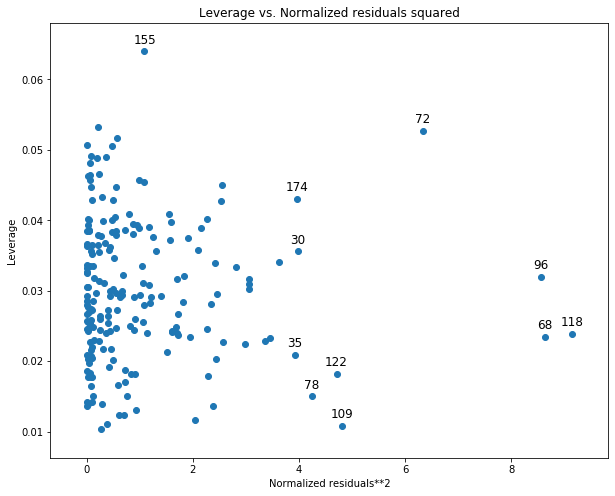

In [71]:
mlr.leverage_resid_plot()

---
### Multicollinearity check
For multiple linear regression, judging multicollinearity is also critical from the statistical inference point of view. This assumption assumes minimal or no linear dependence between the predicting variables.

We can compute the **variance influence factors (VIF)** for each predicting variable. It is the ratio of variance in a model with multiple terms, divided by the variance of a model with one term alone.

We create another special class `Multicollinearity` for this purpose.

In [72]:
class Multicollinearity:
    
    def __init__():
        pass
    
    def vif(self):
        '''Computes variance influence factors for each feature variable'''
        import statsmodels.api as sm
        from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
        lm = sm.OLS(self.target_, sm.add_constant(self.features_)).fit()
        for i in range(self.features_.shape[1]):
            v=vif(np.matrix(self.features_),i)
            print("Variance inflation factor for feature {}: {}".format(i,round(v,2)))

In [73]:
class MyLinearRegression(Metrics, Diagnostics_plots,Data_plots,Outliers,Multicollinearity):
    
    def __init__(self, fit_intercept=True):
        self.coef_ = None
        self.intercept_ = None
        self._fit_intercept = fit_intercept
    
    def __repr__(self):
        return "I am a Linear Regression model!"
    
    def fit(self, X, y):
        """
        Fit model coefficients.

        Arguments:
        X: 1D or 2D numpy array 
        y: 1D numpy array
        """
        
        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
        
        # features and data
        self.features_ = X
        self.target_ = y
        
        # degrees of freedom of population dependent variable variance
        self.dft_ = X.shape[0] - 1   
        # degrees of freedom of population error variance
        self.dfe_ = X.shape[0] - X.shape[1] - 1
            
        # add bias if fit_intercept is True
        if self._fit_intercept:
            X_biased = np.c_[np.ones(X.shape[0]), X]
        else:
            X_biased = X
        
        # closed form solution
        xTx = np.dot(X_biased.T, X_biased)
        inverse_xTx = np.linalg.inv(xTx)
        xTy = np.dot(X_biased.T, y)
        coef = np.dot(inverse_xTx, xTy)
        
        # set attributes
        if self._fit_intercept:
            self.intercept_ = coef[0]
            self.coef_ = coef[1:]
        else:
            self.intercept_ = 0
            self.coef_ = coef
            
        # Predicted/fitted y
        self.fitted_ = np.dot(X,mlr.coef_) + mlr.intercept_
        
        # Residuals
        residuals = self.target_ - self.fitted_
        self.resid_ = residuals
    
    def predict(self, X):
        """Output model prediction.

        Arguments:
        X: 1D or 2D numpy array
        """
        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
        self.predicted_ = self.intercept_ + np.dot(X, self.coef_)
        return self.predicted_

In [74]:
num_samples=200
num_dim = 5
X = 10*np.random.random(size=(num_samples,num_dim))
coeff = np.array([2,-3.5,1.2,4.1,-2.5])
y = np.dot(coeff,X.T)+2*np.random.randn(num_samples)

In [75]:
mlr = MyLinearRegression()
mlr.fit(X,y)

In [76]:
mlr.vif()

Variance inflation factor for feature 0: 2.97
Variance inflation factor for feature 1: 3.58
Variance inflation factor for feature 2: 3.94
Variance inflation factor for feature 3: 3.84
Variance inflation factor for feature 4: 3.33


### Syntactic sugar - `run_diagnostics` and `outlier_plots` methods added to the main class

In [113]:
class MyLinearRegression(Metrics, Diagnostics_plots,Data_plots,Outliers,Multicollinearity):
    
    def __init__(self, fit_intercept=True):
        self.coef_ = None
        self.intercept_ = None
        self._fit_intercept = fit_intercept
    
    def __repr__(self):
        return "I am a Linear Regression model!"
    
    def fit(self, X, y):
        """
        Fit model coefficients.

        Arguments:
        X: 1D or 2D numpy array 
        y: 1D numpy array
        """
        
        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
        
        # features and data
        self.features_ = X
        self.target_ = y
        
        # degrees of freedom of population dependent variable variance
        self.dft_ = X.shape[0] - 1   
        # degrees of freedom of population error variance
        self.dfe_ = X.shape[0] - X.shape[1] - 1
            
        # add bias if fit_intercept is True
        if self._fit_intercept:
            X_biased = np.c_[np.ones(X.shape[0]), X]
        else:
            X_biased = X
        
        # closed form solution
        xTx = np.dot(X_biased.T, X_biased)
        inverse_xTx = np.linalg.inv(xTx)
        xTy = np.dot(X_biased.T, y)
        coef = np.dot(inverse_xTx, xTy)
        
        # set attributes
        if self._fit_intercept:
            self.intercept_ = coef[0]
            self.coef_ = coef[1:]
        else:
            self.intercept_ = 0
            self.coef_ = coef
            
        # Predicted/fitted y
        self.fitted_ = np.dot(X,mlr.coef_) + mlr.intercept_
        
        # Residuals
        residuals = self.target_ - self.fitted_
        self.resid_ = residuals
    
    def predict(self, X):
        """Output model prediction.

        Arguments:
        X: 1D or 2D numpy array
        """
        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
        self.predicted_ = self.intercept_ + np.dot(X, self.coef_)
        return self.predicted_
    
    def run_diagnostics(self):
        '''Runs diagnostics tests and plots'''
        Diagnostics_plots.fitted_vs_residual(self)
        Diagnostics_plots.histogram_resid(self)
        Diagnostics_plots.qqplot_resid(self)
        print()
        Diagnostics_plots.shapiro_test(self)
    
    def outlier_plots(self):
        '''Creates various outlier plots'''
        Outliers.cook_distance(self)
        Outliers.influence_plot(self)
        Outliers.leverage_resid_plot(self)

Now we can generate data and test these new methods

In [114]:
num_samples=200
num_dim = 5
X = 10*np.random.random(size=(num_samples,num_dim))
coeff = np.array([2,-3.5,1.2,4.1,-2.5])
y = np.dot(coeff,X.T)+2*np.random.randn(num_samples)

In [115]:
mlr = MyLinearRegression()
mlr.fit(X,y)

#### Running all diagnostics 

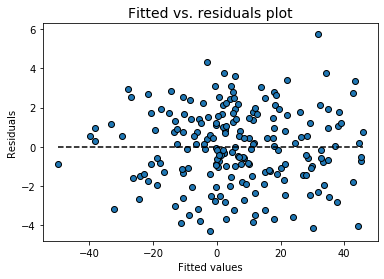

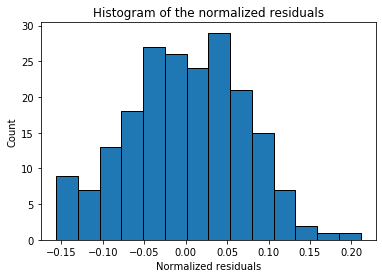

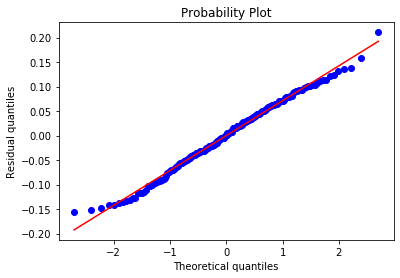


The residuals seem to have come from a Gaussian process


In [116]:
mlr.run_diagnostics()

#### All outlier plots

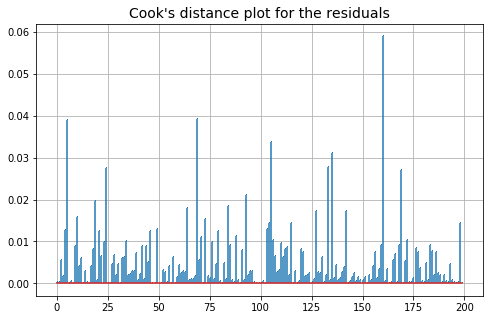

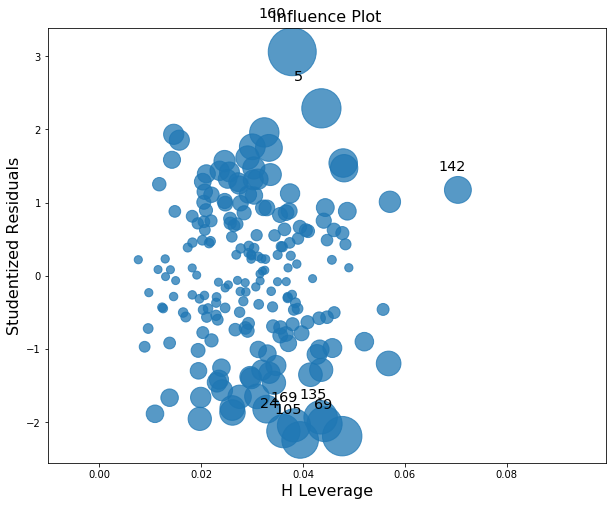

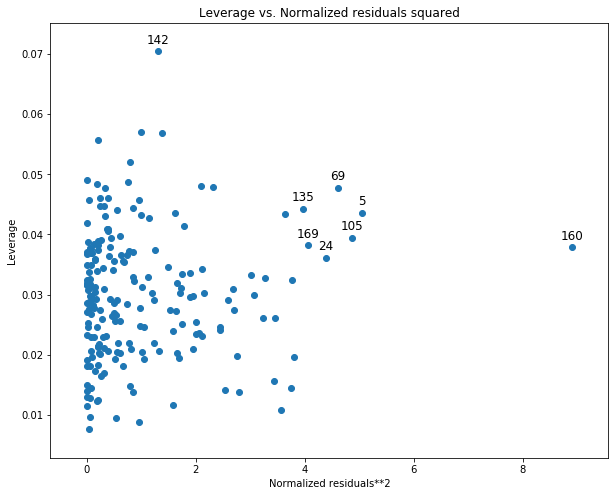

In [117]:
mlr.outlier_plots()